In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def normalize_cm(cm):
    return cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100


# Confusion Matrix for Normal Apnea Level
cm_normal = np.array(
    [
        [9283, 2109, 190],  # Wake
        [589, 11256, 464],  # NREM
        [74, 823, 1514],  # REM
    ]
)

# Confusion Matrix for Mild Apnea Level
cm_mild = np.array(
    [
        [7806, 1775, 98],  # Wake
        [805, 11974, 355],  # NREM
        [148, 742, 1380],  # REM
    ]
)

# Confusion Matrix for Moderate Apnea Level
cm_moderate = np.array(
    [
        [8299, 1909, 115],  # Wake
        [1196, 10977, 389],  # NREM
        [67, 482, 1354],  # REM
    ]
)

# Confusion Matrix for Severe Apnea Level
cm_severe = np.array(
    [
        [8425, 2268, 71],  # Wake
        [802, 12018, 274],  # NREM
        [68, 786, 796],  # REM
    ]
)


# Normalized confusion matrices
cm_normal_norm = normalize_cm(cm_normal)
cm_mild_norm = normalize_cm(cm_mild)
cm_moderate_norm = normalize_cm(cm_moderate)
cm_severe_norm = normalize_cm(cm_severe)

In [2]:
def plot_confusion_matrices(
    cm_normal, cm_mild, cm_moderate, cm_severe, labels=["WAKE", "NREM", "REM"]
):
    """
    Function to plot four confusion matrices (Normal, Mild, Moderate, Severe) in a 2x2 grid.

    Parameters:
    - cm_normal: Confusion matrix for normal cases
    - cm_mild: Confusion matrix for mild cases
    - cm_moderate: Confusion matrix for moderate cases
    - cm_severe: Confusion matrix for severe cases
    - labels: List of labels for the axes (default is ['WAKE', 'NREM', 'REM'])
    """

    # Normalize confusion matrices
    def normalize_cm(cm):
        return cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

    cm_normal_norm = normalize_cm(cm_normal)
    cm_mild_norm = normalize_cm(cm_mild)
    cm_moderate_norm = normalize_cm(cm_moderate)
    cm_severe_norm = normalize_cm(cm_severe)

    # Plotting the confusion matrices
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # More square figure

    # Heatmaps with no color bars and custom annotations
    sns.heatmap(
        cm_normal_norm,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        ax=axes[0, 0],
        cbar=False,
        annot_kws={"size": 24},
    )
    axes[0, 0].set_title("Normal", fontsize=24)

    sns.heatmap(
        cm_mild_norm,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        ax=axes[0, 1],
        cbar=False,
        annot_kws={"size": 24},
    )
    axes[0, 1].set_title("Mild", fontsize=24)

    sns.heatmap(
        cm_moderate_norm,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        ax=axes[1, 0],
        cbar=False,
        annot_kws={"size": 24},
    )
    axes[1, 0].set_title("Moderate", fontsize=24)

    sns.heatmap(
        cm_severe_norm,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        ax=axes[1, 1],
        cbar=False,
        annot_kws={"size": 24},
    )
    axes[1, 1].set_title("Severe", fontsize=24)

    # Add percentage sign manually to the annotations
    for i, ax in enumerate(axes.flat):
        for text in ax.texts:
            text.set_text(f"{text.get_text()}%")

    # Set y-axis labels only for the far left
    axes[0, 0].set_yticks([0.5, 1.5, 2.5])
    axes[1, 0].set_yticks([0.5, 1.5, 2.5])
    axes[0, 0].set_yticklabels(labels, fontsize=24)
    axes[1, 0].set_yticklabels(labels, fontsize=24)

    # Remove y-axis tick labels from axes[0, 1] and axes[1, 1]
    axes[0, 1].set_yticks([])
    axes[1, 1].set_yticks([])

    # Remove x-axis labels from the top-left and top-right plots
    axes[0, 0].set_xticks([])
    axes[0, 1].set_xticks([])

    # Set x-axis labels (WAKE, NREM, REM) for the bottom-left and bottom-right plot
    axes[1, 0].set_xticks([0.5, 1.5, 2.5])
    axes[1, 1].set_xticks([0.5, 1.5, 2.5])
    axes[1, 0].set_xticklabels(labels, fontsize=24)
    axes[1, 1].set_xticklabels(labels, fontsize=24)

    # Set x and y axis labels only on the far left and bottom plots
    axes[1, 0].set_xlabel("Predicted Label", fontsize=24)
    axes[1, 1].set_xlabel("Predicted Label", fontsize=24)
    axes[0, 0].set_ylabel("True Label", fontsize=24)
    axes[1, 0].set_ylabel("True Label", fontsize=24)

    plt.tight_layout()
    plt.show()

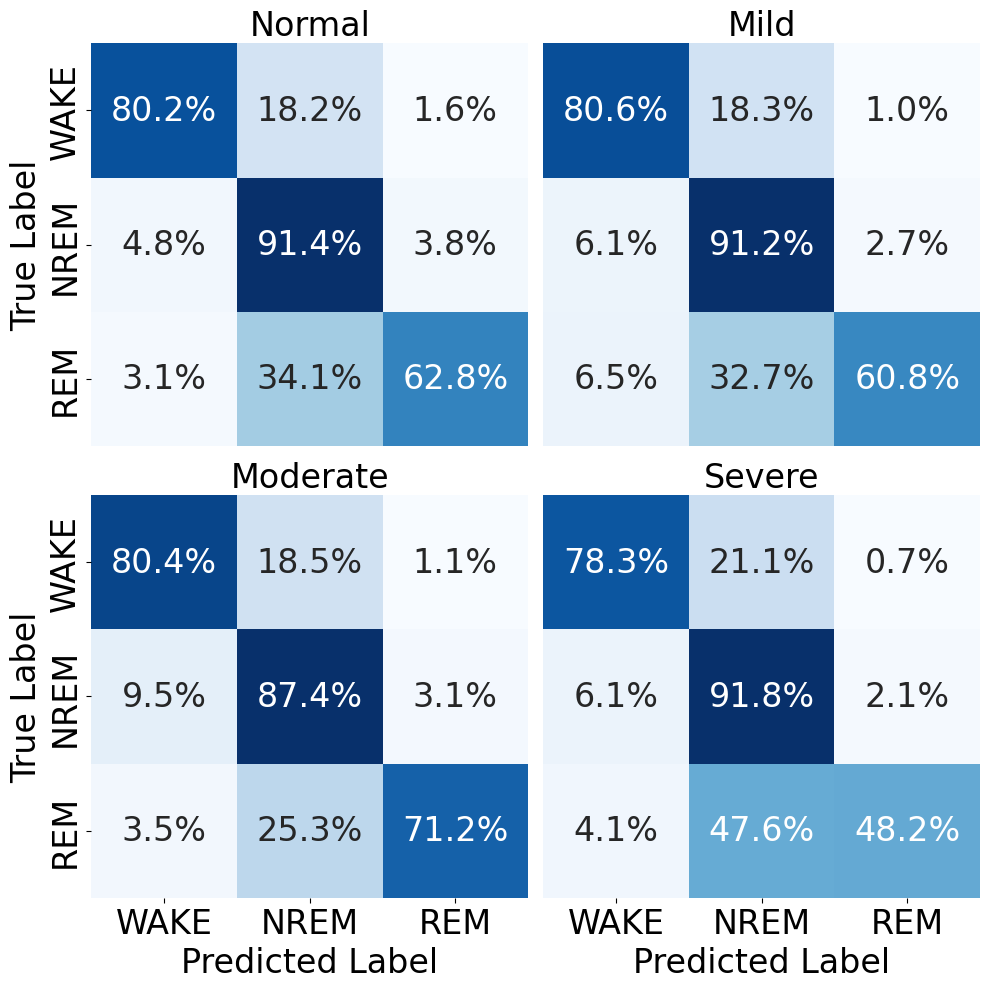

In [3]:
plot_confusion_matrices(cm_normal, cm_mild, cm_moderate, cm_severe)

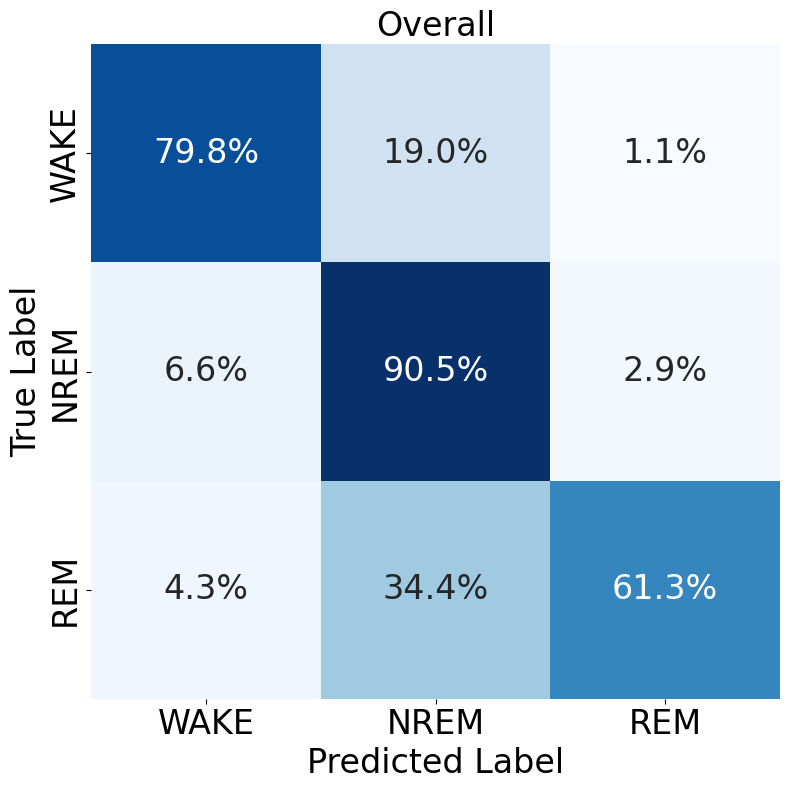

In [4]:
# Overall Confusion Matrix
cm_overall = np.array(
    [
        [33813, 8061, 474],  # Wake
        [3392, 46225, 1482],  # NREM
        [357, 2833, 5044],  # REM
    ]
)
# Normalize the confusion matrix
cm_overall_norm = (
    cm_overall.astype("float") / cm_overall.sum(axis=1)[:, np.newaxis] * 100
)

# Labels for the axes
labels = ["WAKE", "NREM", "REM"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))  # Adjust the size as needed for better readability

# Heatmap with no color bar and custom annotations
ax = sns.heatmap(
    cm_overall_norm,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 24},
)

# Set the title
ax.set_title("Overall", fontsize=24)

# Add percentage signs to the annotations
for text in ax.texts:
    text.set_text(f"{text.get_text()}%")

# Set x and y axis labels and tick labels
ax.set_xlabel("Predicted Label", fontsize=24)
ax.set_ylabel("True Label", fontsize=24)
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(labels, fontsize=24)
ax.set_yticks([0.5, 1.5, 2.5])
ax.set_yticklabels(labels, fontsize=24)

plt.tight_layout()
plt.show()

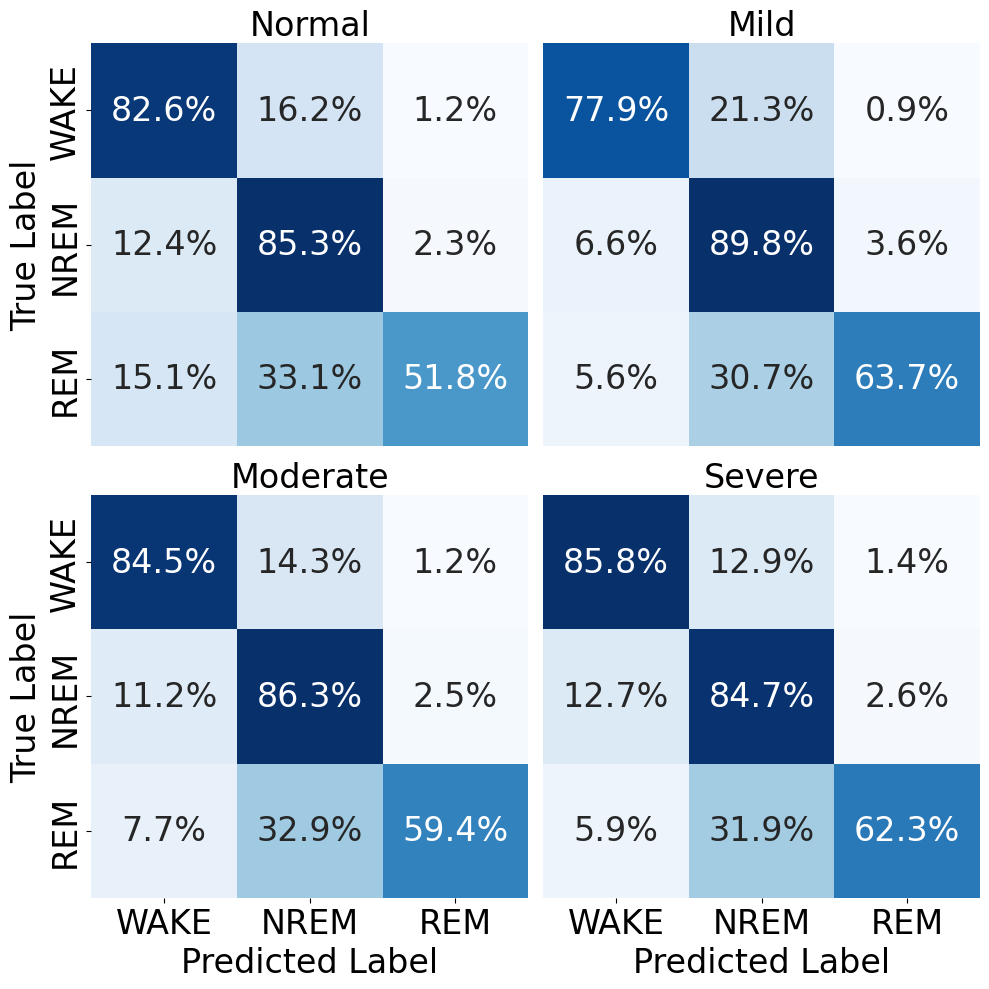

In [23]:
cm_normal = np.array(
    [[8192, 1611, 115], [1580, 10911, 295], [264, 579, 905]]  # Wake  # NREM  # REM
)
cm_mild = np.array(
    [[7172, 1959, 79], [802, 10976, 438], [132, 728, 1509]]  # Wake  # NREM  # REM
)
cm_moderate = np.array(
    [[7759, 1310, 108], [1336, 10283, 299], [172, 733, 1324]]  # Wake  # NREM  # REM
)
cm_severe = np.array(
    [[9555, 1434, 151], [1353, 8993, 271], [86, 466, 911]]  # Wake  # NREM  # REM
)
# Normalized confusion matrices
cm_normal_norm = normalize_cm(cm_normal)
cm_mild_norm = normalize_cm(cm_mild)
cm_moderate_norm = normalize_cm(cm_moderate)
cm_severe_norm = normalize_cm(cm_severe)
plot_confusion_matrices(cm_normal, cm_mild, cm_moderate, cm_severe)